# Piazza and Background Poll *(finished)*

# Basic Matrix/Vector Manipulation

In [1]:
# CS231A Homework 0, Problem 2
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

In [2]:
# ===== Problem 2a =====
# Define Matrix M and Vectors a,b,c in Python with NumPy
M = np.array([[1,2,3], [4,5,6], [7,8,9], [0,2,2]])
a = np.array([1,1,0])
b = np.array([-1,2,5])
c = np.array([0,2,3,2])

In [3]:
# ===== Problem 2b =====
# Find the dot product of vectors a and b, save the value to aDotb
aDotb = None
aDotb = a.dot(b)
print "(b) aDotb =", aDotb

(b) aDotb = 1


In [4]:
# ===== Problem 2c =====
# Find the element-wise product of a and b
aMultib = np.multiply(a, b)
print "(c) aMultib =", aMultib

(c) aMultib = [-1  2  0]


In [5]:
# ===== Problem 2d =====
# Find (a^T b)Ma
dResult = aDotb * M.dot(a)
print "(d) (a^T b)Ma =", dResult

(d) (a^T b)Ma = [ 3  9 15  2]


In [6]:
# ===== Problem 2e =====
# Without using a loop, multiply each row of M element-wise by a.
newM = None
a_repmat = np.matlib.repmat(a, 4, 1)
newM = np.multiply(M, a_repmat)

# with broadcasting, we can simply calculate: newM = np.multiply(M, a)
print "(e) result =\n", newM

(e) result =
[[1 2 0]
 [4 5 0]
 [7 8 0]
 [0 2 0]]


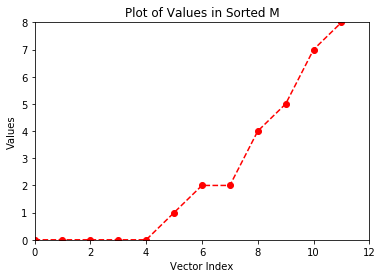

In [7]:
# ===== Problem 2f =====
# Without using a loop, sort all of the values 
# of M in increasing order and plot them.
# Note we want you to use newM from e.
sortedM = np.sort(newM, axis=None)
N = len(sortedM)
x = range(N)

plt.xlabel("Vector Index")
plt.ylabel("Values")
plt.title("Plot of Values in Sorted M")
plt.plot(x, sortedM, 'ro--')
plt.axis([0, N, np.min(sortedM), np.max(sortedM)])
plt.show()

# Basic Image Manipulations

In [8]:
# CS231A Homework 0, Problem 3
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

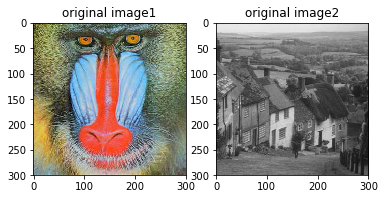

In [9]:
# ===== Problem 3a =====
# Read in the images, image1.jpg and image2.jpg, as color images.

img1, img2 = None, None

img1 = misc.imread('./student/image1.jpg')
img2 = misc.imread('./student/image2.jpg')

plt.subplot(1, 2, 1)
plt.title("original image1")
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title("original image2")
plt.imshow(img2)
plt.show()

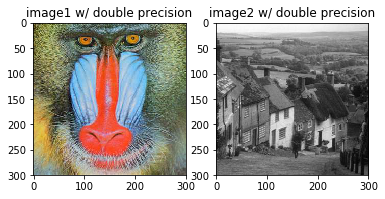

In [10]:
# ===== Problem 3b =====
# Convert the images to double precision and rescale them
# to stretch from minimum value 0 to maximum value 1.

def imagescaling(img):
    pixmax = np.max(img)
    pixmin = np.min(img)
    return (img - pixmin) / (pixmax - pixmin)

img1 = img1.astype('float')
img2 = img2.astype('float')

# scale images
img1 = imagescaling(img1)
img2 = imagescaling(img2)

plt.subplot(1, 2, 1)
plt.title("image1 w/ double precision")
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title("image2 w/ double precision")
plt.imshow(img2)
plt.show()

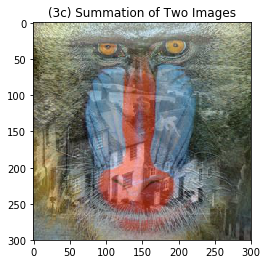

In [11]:
# ===== Problem 3c =====
# Add the images together and re-normalize them 
# to have minimum value 0 and maximum value 1. 
# Display this image.

img12 = img1 + img2
img12 = imagescaling(img12)
plt.title("(3c) Summation of Two Images")
plt.imshow(img12)
plt.show()

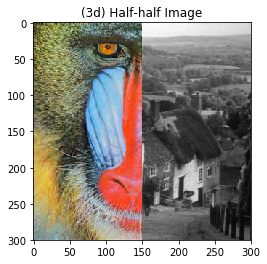

In [12]:
# ===== Problem 3d =====
# Create a new image such that the left half of 
# the image is the left half of image1 and the 
# right half of the image is the right half of image2.

newImage1 = None

# image1 and image2 have the same size
imageShape = np.shape(img1)
row = np.shape(img1)[0]
col = np.shape(img1)[1]
centerCol = np.shape(img1)[1]/2
filterL = np.ones((row, centerCol, 3))
filterR = np.zeros((row, col - centerCol, 3))
filter1 = np.concatenate((filterL, filterR), axis=1)
filter2 = np.concatenate((filterR, filterL), axis=1)

newImage1 = np.multiply(img1, filter1) + np.multiply(img2, filter2)
plt.title("(3d) Half-half Image")
plt.imshow(newImage1)
plt.show()

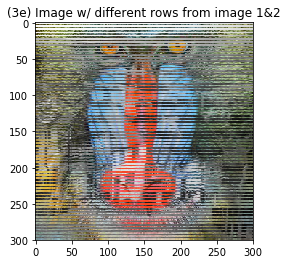

In [13]:
# ===== Problem 3e =====
# Using a for loop, create a new image such that every odd 
# numbered row is the corresponding row from image1 and the 
# every even row is the corresponding row from image2. 
# Hint: Remember that indices start at 0 and not 1 in Python.

newImage2 = None
newImage2 = np.zeros(imageShape)
for i in range(row):
    if i % 2 == 0:
        newImage2[i] = img2[i] # even numbered row from image2
    else:
        newImage2[i] = img1[i] # odd numbered row from image1

plt.title("(3e) Image w/ different rows from image 1&2")
plt.imshow(newImage2)
plt.show()

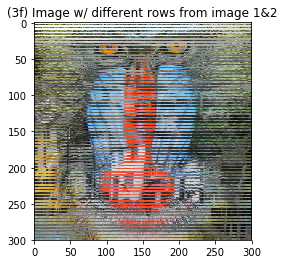

In [14]:
# ===== Problem 3f =====
# Accomplish the same task as part e without using a for-loop.
# The functions reshape and repmat may be helpful here.

newImage3 = None
evenRowMask = np.concatenate((np.ones((1, col, 3)), np.zeros((1, col, 3))), axis=0)
oddRowMask = np.concatenate((np.zeros((1, col, 3)), np.ones((1, col, 3))), axis=0)
rowFilter1 = np.tile(oddRowMask, (row/2, 1, 1))
rowFilter2 = np.tile(evenRowMask, (row/2, 1, 1))

newImage3 = np.multiply(img1, rowFilter1) + np.multiply(img2, rowFilter2)
plt.title("(3f) Image w/ different rows from image 1&2")
plt.imshow(newImage3)
plt.show()

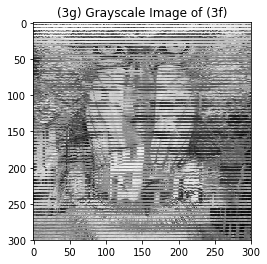

In [15]:
# ===== Problem 3g =====
# Convert the result from part f to a grayscale image. 
# Display the grayscale image with a title.

def rgb2gray(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

# Convert the image
newImage4 = np.zeros((newImage3.shape[0], newImage3.shape[1])) # init 2D numpy array
for r in range(len(newImage3)):
   for c in range(len(newImage3[r])):
      newImage4[r][c] = rgb2gray(newImage3[r][c])

plt.title("(3g) Grayscale Image of (3f)")
plt.imshow(newImage4, cmap=plt.cm.Greys_r)
plt.show()

# Singular Value Decomposition

In [16]:
# CS231A Homework 0, Problem 4
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

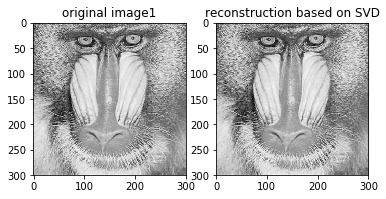

In [17]:
# ===== Problem 4a =====
# Read in image1 as a grayscale image. Take the singular value
# decomposition of the image.

img1 = None
img1 = misc.imread('./student/image1.jpg', 'L')

# Reconstruction based on reduced SVD
U, s, V = np.linalg.svd(img1, full_matrices=False)
S = np.diag(s)
imgSVD = np.dot(U, np.dot(S, V))

plt.subplot(1, 2, 1)
plt.title("original image1")
plt.imshow(img1, cmap=plt.cm.Greys_r)

plt.subplot(1, 2, 2)
plt.title("reconstruction based on SVD")
plt.imshow(imgSVD, cmap=plt.cm.Greys_r)
plt.show()

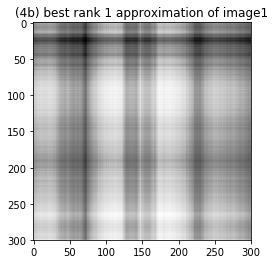

In [18]:
# ===== Problem 4b =====
# Save and display the best rank 1 approximation 
# of the (grayscale) image1.

rank1approx = None

row = np.shape(img1)[0]
col = np.shape(img1)[1]
u1 = np.reshape(U[:, 0], (row, 1))
s1= S[0, 0]
v1 = np.reshape(V[0, :], (1, col))
rank1approx = np.dot(u1, s1 * v1)
plt.title("(4b) best rank 1 approximation of image1")
plt.imshow(rank1approx, cmap=plt.cm.Greys_r)
plt.show()
misc.imsave('./student/rank1approx.jpg', rank1approx)

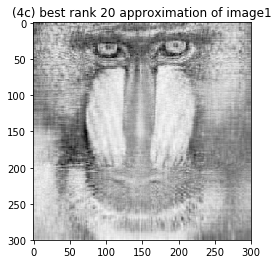

In [19]:
# ===== Problem 4c =====
# Save and display the best rank 20 approximation
# of the (grayscale) image1.

rank20approx = None

rank20approx = np.zeros(np.shape(img1))
for i in range(20):
    ui = np.reshape(U[:, i], (row, 1))
    si= S[i, i]
    vi = np.reshape(V[i, :], (1, col))
    rank20approx += np.dot(ui, si * vi)

plt.title("(4c) best rank 20 approximation of image1")
plt.imshow(rank20approx, cmap=plt.cm.Greys_r)
plt.show()
misc.imsave('./student/rank20approx.jpg', rank20approx)